In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date, datetime


In [ ]:
df = pd.read_csv('post_OK.csv')

In [ ]:
df.head()

,Unnamed: 0,ID,Date,Subreddit,URL,Title,Text,Author,Score,num_comment,Post,PostClean,emotion,hate,irony,offensive,sentiment
0,0,1gl2h1y,2024-11-06 16:28:01,womenintech,https://www.reddit.com/r/womenintech/comments/...,Election talk at work: don’t take the bait,"If anyone, but especially men, at work want to...",user_1,10676,484,Election talk at work: don’t take the bait If...,election talk at work dont take the bait if an...,anger,not-hate,non_irony,not-offensive,negative
1,1,1hcv1ab,2024-12-12 20:51:55,womenintech,https://www.reddit.com/r/womenintech/comments/...,Stand your ground. You’re not a secretary,What are the creative ways you’ve had to tell ...,user_2,5001,396,Stand your ground. You’re not a secretary Wha...,stand your ground youre not a secretary what a...,anger,not-hate,non_irony,not-offensive,neutral
2,2,1fzvk1s,2024-10-09 16:28:10,womenintech,https://fortune.com/2024/08/08/most-high-perfo...,Around 76% of high-performing women receive ne...,About 76% of top-performing working women rece...,user_3,4278,327,Around 76% of high-performing women receive ne...,around of high performing women receive negati...,sadness,not-hate,irony,not-offensive,negative
3,3,1eemu9y,2024-07-29 01:01:50,womenintech,https://www.reddit.com/r/womenintech/comments/...,Colleague assumed I was pregnant when I said “...,"A few weeks ago, I was taking a virtual meetin...",user_4,2698,148,Colleague assumed I was pregnant when I said “...,colleague assumed i was pregnant when i said i...,joy,not-hate,non_irony,not-offensive,negative
4,4,1ey5rsx,2024-08-22 00:32:53,womenintech,https://www.reddit.com/r/womenintech/comments/...,This is why women leave tech,I feel like I'm at a breaking point here. I lo...,user_5,2146,197,This is why women leave tech I feel like I'm a...,this is why women leave tech i feel like i m a...,anger,not-hate,irony,not-offensive,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2367 non-null   int64 
 1   ID           2367 non-null   object
 2   Date         2367 non-null   object
 3   Subreddit    2367 non-null   object
 4   URL          2367 non-null   object
 5   Title        2367 non-null   object
 6   Text         2233 non-null   object
 7   Author       2367 non-null   object
 8   Score        2367 non-null   int64 
 9   num_comment  2367 non-null   int64 
 10  Post         2233 non-null   object
 11  PostClean    2233 non-null   object
 12  emotion      2367 non-null   object
 13  hate         2367 non-null   object
 14  irony        2367 non-null   object
 15  offensive    2367 non-null   object
 16  sentiment    2367 non-null   object
dtypes: int64(3), object(14)
memory usage: 314.5+ KB


# Hate, Irony and Offensive Analysis

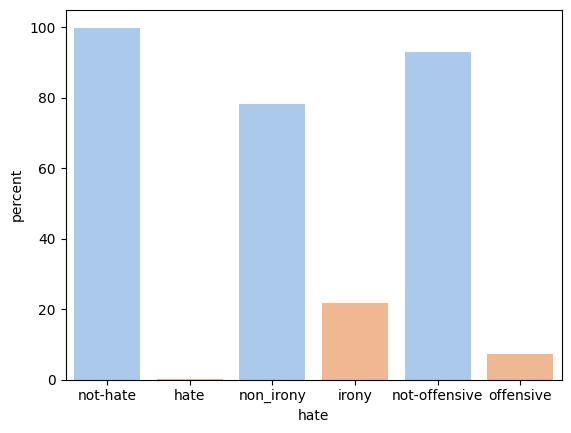

In [98]:
# Hate, Irony and Offensive percentage
i = 0
for tp in ['hate', 'irony', 'offensive']:
  sns.countplot(x=tp, data=df,stat='percent', hue = tp, palette='pastel')
  i += 1

In [ ]:
# hate values
tbl_abs = df['hate'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
hate_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
hate_df

,abs,rel
hate,,
not-hate,2364,0.998733
hate,3,0.001267


In [ ]:
# irony values
tbl_abs = df['irony'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
irony_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
irony_df

,abs,rel
irony,,
non_irony,1851,0.782003
irony,516,0.217997


In [ ]:
# offensive values
tbl_abs = df['offensive'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
irony_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
irony_df

,abs,rel
offensive,,
not-offensive,2197,0.928179
offensive,170,0.071821


# Sentimental and Emotion Analysis

<Axes: xlabel='emotion', ylabel='percent'>

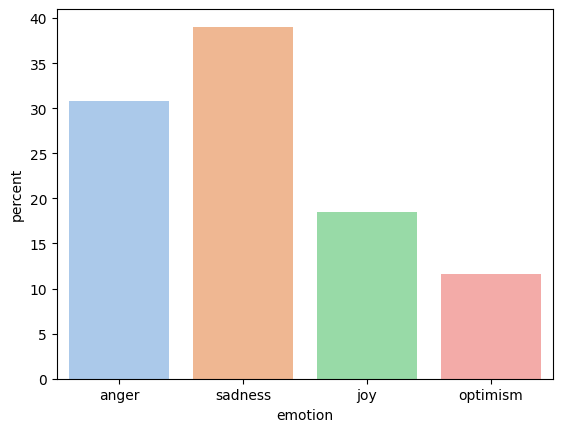

In [99]:
## emotion %
sns.countplot(x='emotion', data=df,stat='percent', hue = 'emotion', palette='pastel')

In [ ]:
## emotion values
tbl_abs = df['emotion'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
emotion_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
emotion_df

,abs,rel
emotion,,
anger,729,0.307985
sadness,924,0.390368
joy,438,0.185044
optimism,276,0.116603


<Axes: xlabel='sentiment', ylabel='percent'>

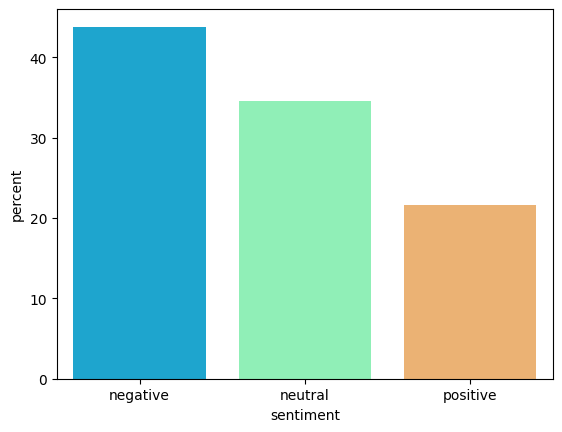

In [ ]:
## sentiment %
sns.countplot(x='sentiment', data=df,stat='percent', hue = 'sentiment', palette='rainbow')

In [ ]:
## emotion values
tbl_abs = df['sentiment'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
sentiment_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
sentiment_df

,abs,rel
sentiment,,
negative,1037,0.438107
neutral,818,0.345585
positive,512,0.216308


In [ ]:
## sentiment vs emotion

In [ ]:
## abs value
df_sent = df.groupby(['sentiment','emotion'])
#df_sent['emotion'].count().to_latex('tbl_sent.tex')
df_sent['emotion'].count()

sentiment  emotion 
negative   anger       528
           joy           5
           sadness     504
neutral    anger       167
           joy         215
           optimism    113
           sadness     323
positive   anger        34
           joy         218
           optimism    163
           sadness      97
Name: emotion, dtype: int64

In [ ]:
## relative value (total)
df_sent['emotion'].count().transform(lambda x: 100 * x / x.sum())

sentiment  emotion 
negative   anger       22.306717
           joy          0.211238
           sadness     21.292776
neutral    anger        7.055344
           joy          9.083228
           optimism     4.773975
           sadness     13.645965
positive   anger        1.436417
           joy          9.209970
           optimism     6.886354
           sadness      4.098014
Name: emotion, dtype: float64

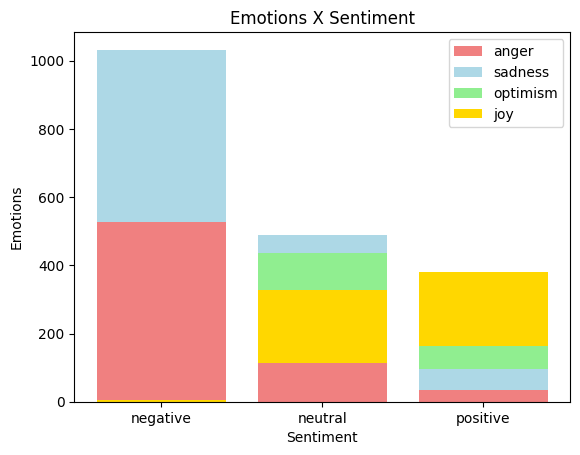

In [ ]:
## Aggrement sentiment and emotion

sentiment = df['sentiment'].unique()
emotion = df['emotion'].unique()

x = sentiment

anger	= [528,167,34]
joy = [5,215,218]
sadness = [504,323,97]
optimism=	[0,113,163]

# Stacked Bar Plot
plt.bar(x, anger, label=emotion[0], color='lightcoral')
plt.bar(x, sadness, label=emotion[1], color='lightblue', bottom=anger)
plt.bar(x, optimism, label=emotion[3], color='lightgreen', bottom=sadness)
plt.bar(x, joy, label=emotion[2], color='gold', bottom=optimism)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Emotions')
plt.title('Emotions X Sentiment')
plt.legend()
plt.show()

In [ ]:
## % emotion by sentiment

In [ ]:
## negative values
neg_df = df[df['sentiment'] == 'negative']
tbl_abs = neg_df['emotion'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
es_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
es_df

,abs,rel
emotion,,
anger,528,0.509161
sadness,504,0.486017
joy,5,0.004822


In [ ]:
## positive values
pos_df = df[df['sentiment'] == 'positive']
tbl_abs = pos_df['emotion'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
es_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
es_df

,abs,rel
emotion,,
anger,34,0.066406
sadness,97,0.189453
joy,218,0.425781
optimism,163,0.318359


In [ ]:
## neutral values
neu_df = df[df['sentiment'] == 'neutral']
pos_df = df[df['sentiment'] == 'positive']
tbl_abs = neu_df['emotion'].value_counts(sort=False)
tbl_rel = tbl_abs/ tbl_abs.sum()
es_df = pd.DataFrame({'abs':tbl_abs,'rel':tbl_rel})
es_df

,abs,rel
emotion,,
anger,167,0.204156
joy,215,0.262836
sadness,323,0.394866
optimism,113,0.138142


#Temporal Analysis

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
## group by year/month

In [ ]:
df['dt'] = df['Date'].dt.strftime('%Y-%m')

In [ ]:
value_dt = pd.Series(df.groupby('dt')['Date'].count())

<Axes: xlabel='dt'>

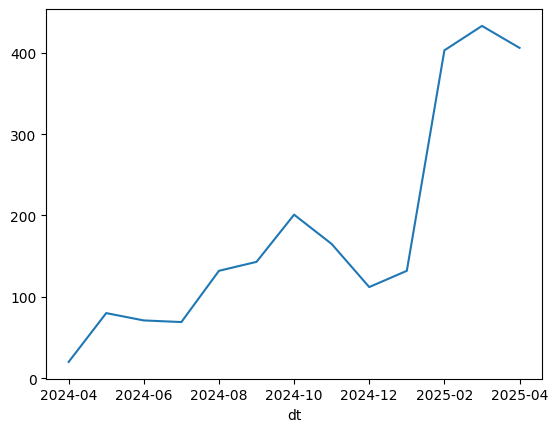

In [ ]:
value_dt.plot(kind='line')

In [ ]:
# when started the  law
end = '2025-01-20'

In [ ]:
# before trump law
before = df[df['Date'] < end]
# abs value
abs = before.ID.count()
# relative value
rel = abs/ len(df)
print(f" absolute: {abs} relative: {rel}")

 absolute: 1050 relative: 0.4435994930291508


In [ ]:
# after trump law
after = df[df['Date'] >= end]
# abs value
abs = after.ID.count()
# relative value
rel = abs/ len(df)
print(f" absolute: {abs} relative: {rel}")

 absolute: 1317 relative: 0.5564005069708492


In [ ]:
## colum before  ** law type bool **
df['before'] = df['Date'] < end


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2024-04'),
  Text(1, 0, '2024-05'),
  Text(2, 0, '2024-06'),
  Text(3, 0, '2024-07'),
  Text(4, 0, '2024-08'),
  Text(5, 0, '2024-09'),
  Text(6, 0, '2024-10'),
  Text(7, 0, '2024-11'),
  Text(8, 0, '2024-12'),
  Text(9, 0, '2025-01'),
  Text(10, 0, '2025-02'),
  Text(11, 0, '2025-03'),
  Text(12, 0, '2025-04')])

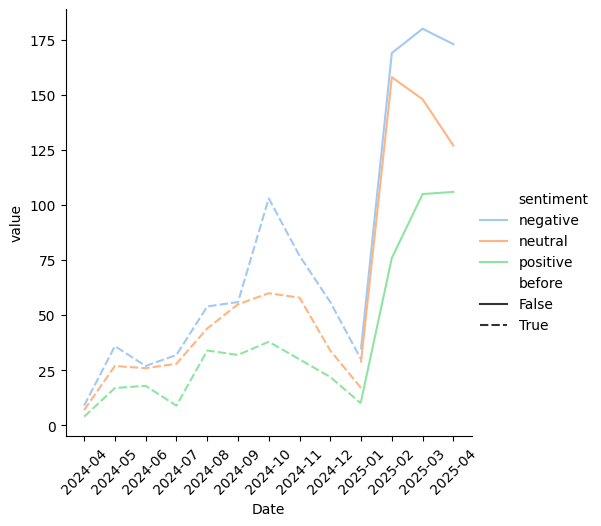

In [92]:
 # sentiment by time
trump = pd.Series(df.groupby(['dt','sentiment','before'])['ID'].count())
label = trump.index.get_level_values('sentiment')
dt = trump.index.get_level_values('dt')
before= trump.index.get_level_values('before')
value = trump.values
df_trump = pd.DataFrame({'sentiment':label,'dt':dt,'before':before, "value":value})
 ### plot
sns.relplot(data=df_trump, kind="line",x="dt", y="value", hue="sentiment", style="before", palette='pastel')
plt.xlabel("Date")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2024-04'),
  Text(1, 0, '2024-05'),
  Text(2, 0, '2024-06'),
  Text(3, 0, '2024-07'),
  Text(4, 0, '2024-08'),
  Text(5, 0, '2024-09'),
  Text(6, 0, '2024-10'),
  Text(7, 0, '2024-11'),
  Text(8, 0, '2024-12'),
  Text(9, 0, '2025-01'),
  Text(10, 0, '2025-02'),
  Text(11, 0, '2025-03'),
  Text(12, 0, '2025-04')])

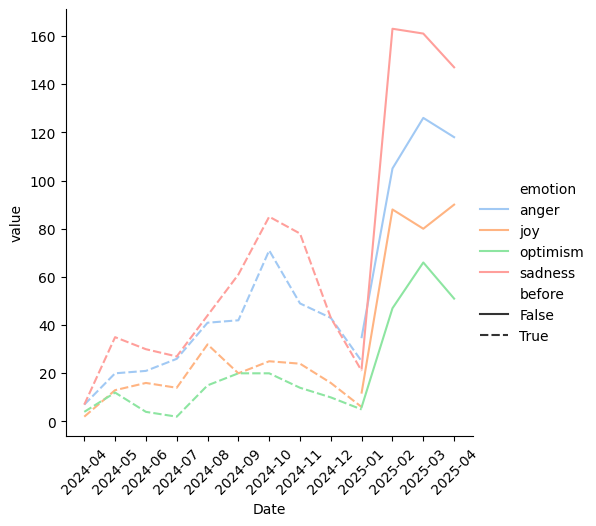

In [93]:
 # emotion by time
trump = pd.Series(df.groupby(['dt','emotion','before'])['ID'].count())
label = trump.index.get_level_values('emotion')
dt = trump.index.get_level_values('dt')
before = trump.index.get_level_values('before')
value = trump.values
df_trump = pd.DataFrame({'emotion':label,'dt':dt,'before':before, "value":value})
 ### plot emotion
sns.relplot(data=df_trump, kind="line",x="dt", y="value", hue="emotion", style="before", palette='pastel')
plt.xlabel("Date")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2024-04'),
  Text(1, 0, '2024-05'),
  Text(2, 0, '2024-06'),
  Text(3, 0, '2024-07'),
  Text(4, 0, '2024-08'),
  Text(5, 0, '2024-09'),
  Text(6, 0, '2024-10'),
  Text(7, 0, '2024-11'),
  Text(8, 0, '2024-12'),
  Text(9, 0, '2025-01'),
  Text(10, 0, '2025-02'),
  Text(11, 0, '2025-03'),
  Text(12, 0, '2025-04')])

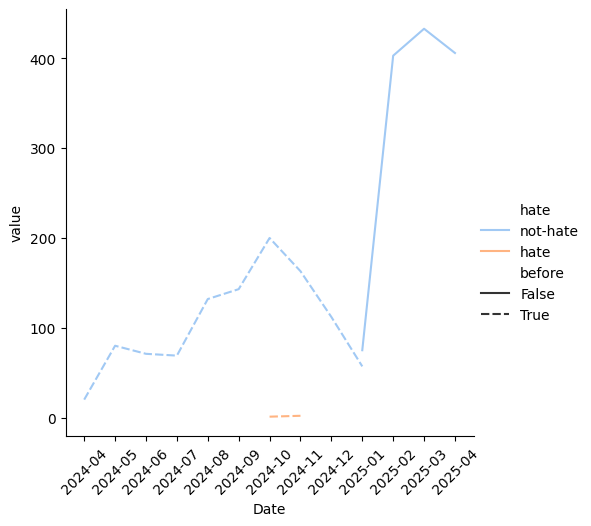

In [95]:
 # hate by time
trump = pd.Series(df.groupby(['dt','hate','before'])['ID'].count())
label = trump.index.get_level_values('hate')
dt = trump.index.get_level_values('dt')
before = trump.index.get_level_values('before')
value = trump.values
df_trump = pd.DataFrame({'hate':label,'dt':dt,'before':before, "value":value})
 ### plot emotion
sns.relplot(data=df_trump, kind="line",x="dt", y="value", hue="hate", style="before", palette='pastel')
plt.xlabel("Date")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2024-04'),
  Text(1, 0, '2024-05'),
  Text(2, 0, '2024-06'),
  Text(3, 0, '2024-07'),
  Text(4, 0, '2024-08'),
  Text(5, 0, '2024-09'),
  Text(6, 0, '2024-10'),
  Text(7, 0, '2024-11'),
  Text(8, 0, '2024-12'),
  Text(9, 0, '2025-01'),
  Text(10, 0, '2025-02'),
  Text(11, 0, '2025-03'),
  Text(12, 0, '2025-04')])

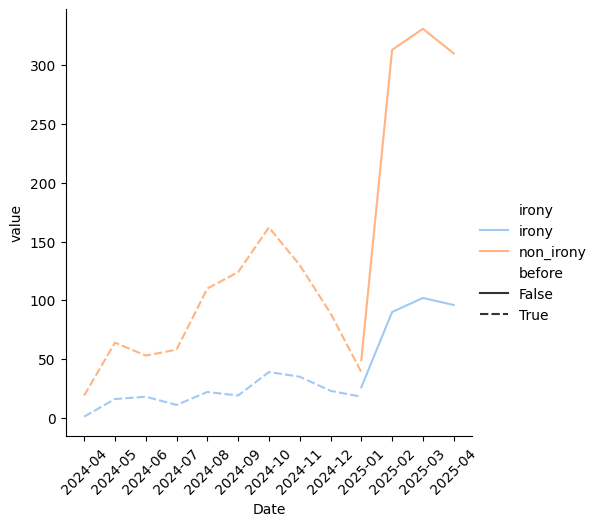

In [96]:
 # irony by time
trump = pd.Series(df.groupby(['dt','irony','before'])['ID'].count())
label = trump.index.get_level_values('irony')
dt = trump.index.get_level_values('dt')
before = trump.index.get_level_values('before')
value = trump.values
df_trump = pd.DataFrame({'irony':label,'dt':dt,'before':before, "value":value})
 ### plot emotion
sns.relplot(data=df_trump, kind="line",x="dt", y="value", hue="irony", style="before", palette='pastel')
plt.xlabel("Date")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2024-04'),
  Text(1, 0, '2024-05'),
  Text(2, 0, '2024-06'),
  Text(3, 0, '2024-07'),
  Text(4, 0, '2024-08'),
  Text(5, 0, '2024-09'),
  Text(6, 0, '2024-10'),
  Text(7, 0, '2024-11'),
  Text(8, 0, '2024-12'),
  Text(9, 0, '2025-01'),
  Text(10, 0, '2025-02'),
  Text(11, 0, '2025-03'),
  Text(12, 0, '2025-04')])

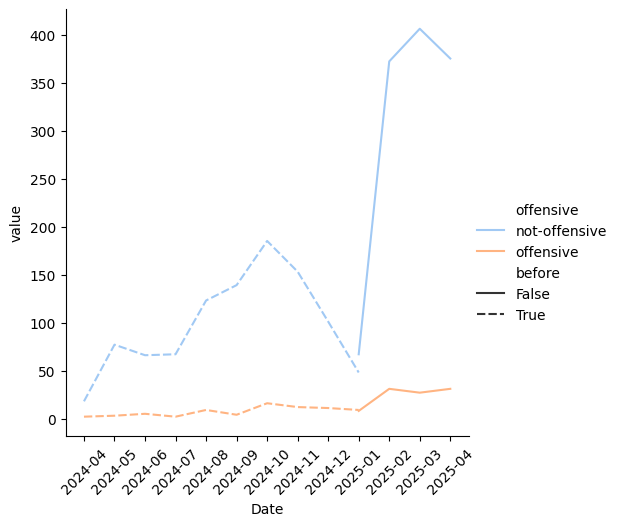

In [97]:
 # Offensive by time
trump = pd.Series(df.groupby(['dt','offensive','before'])['ID'].count())
label = trump.index.get_level_values('offensive')
dt = trump.index.get_level_values('dt')
before = trump.index.get_level_values('before')
value = trump.values
df_trump = pd.DataFrame({'offensive':label,'dt':dt,'before':before, "value":value})
 ### plot emotion
sns.relplot(data=df_trump, kind="line",x="dt", y="value", hue="offensive", style="before", palette='pastel')
plt.xlabel("Date")
plt.xticks(rotation=45)